In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import joblib


In [2]:
df_ = pd.read_excel('data/recipe_data_with_Eng_name.xlsx', sheet_name='English_version', header=0)
df_.columns

Index(['recipe_id', 'recipe_name', 'img_url', 'author_type', 'author_name',
       'published_datetime', 'modified_datetime', 'recipe_description',
       'servings', 'cooking_time', 'instructions', 'recipe_cuisine',
       'nutrition', 'keywords', 'cliped_count', 'search_word',
       'modified_ingredients', 'nutrients', 'GHG_production', 'price',
       'disposal_amount', 'GHG_disposal', 'GHG_cooking', 'GHG_total', 'dish',
       'ingredients_category', 'category', 'cooking_method', 'Energy (g)',
       'Fat (g)', 'carbohydrates (g)', 'zinc (mg)', 'Folic acid (μg)',
       'Protein (g)', 'Total fiber (g)', 'Vitamin A (μg)', 'Vitamin C (mg)',
       'Vitamin E (mg)', 'Calcium (mg)', 'iron (mg)', 'Potassium (mg)',
       'Magnesium (mg)', 'Saturated fat (g)', 'cholesterol (g)',
       'Salt equivalent (g)'],
      dtype='object')

In [3]:
rename_dict = {'GHG_total': 'GHG',
               'Energy (g)': 'calories_kcal',
               'Fat (g)': 'fat_g',
               'carbohydrates (g)': 'carbs_g',
               'Protein (g)': 'protein_g',
}
df_.rename(columns=rename_dict, inplace=True)
df_.drop(0, axis=0, inplace=True)
df = df_[['recipe_id', 'recipe_name', 'GHG', 'calories_kcal', 'fat_g', 'carbs_g', 'protein_g']].copy()
               
               

In [4]:
df

,recipe_id,recipe_name,GHG,calories_kcal,fat_g,carbs_g,protein_g
1,800033,Tender and Moist Roast Beef,1393.079446,309.967500,25.950000,2.712500,19.800000
2,709927,Flavored Roast Beef,1411.035573,324.210000,20.735500,12.147125,20.646500
3,709224,Beef Soboro Rice with Broth,613.210593,363.106000,5.977600,66.347200,10.388800
4,709084,Sukiyaki-style Beef and Chinese Cabbage,1964.183511,483.255000,37.639500,20.024500,18.152000
5,708278,"Meat-wrapped ""Hondashi"" Rice Ball",1610.185267,671.356932,22.013239,86.444284,26.024659
...,...,...,...,...,...,...,...
383,709222,Ginger Rice Cooked in Broth,248.242651,281.547500,1.984500,59.395750,6.214000
384,706165,Stir-fry of Komatsuna Greens and Fried Tofu,269.776480,107.022500,9.332250,2.570250,5.197500
385,706085,Simmered Komatsuna Greens and Fried Tofu,252.664399,93.042500,5.289000,6.155500,5.127250
386,706368,Refreshing Salad with Wakame Seaweed and Nagai...,157.163945,52.190625,0.283062,10.728312,2.238625


Text(0, 0.5, 'PCA 2')

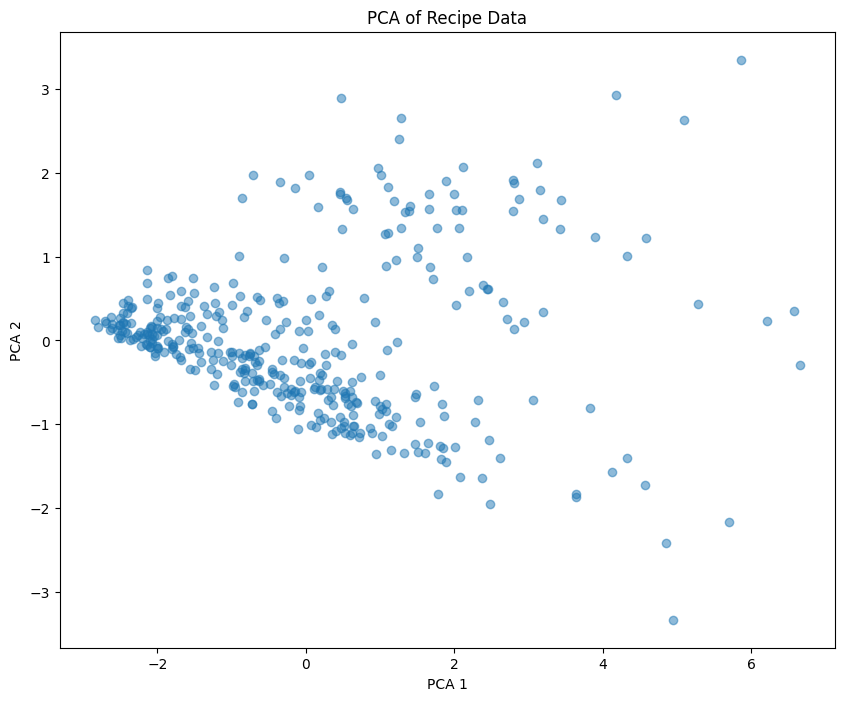

In [5]:
pca = PCA(n_components=2)
scaler = StandardScaler()
X = df[['GHG', 'calories_kcal', 'fat_g', 'carbs_g', 'protein_g']].values
X = scaler.fit_transform(X)
X = pca.fit_transform(X)
df['pca1'] = X[:, 0]
df['pca2'] = X[:, 1]
df['pca1'] = df['pca1'].astype(float)
df['pca2'] = df['pca2'].astype(float)

# Plot PCA
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], alpha=0.5)
plt.title('PCA of Recipe Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

/home/querriqe/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'PCA 2')

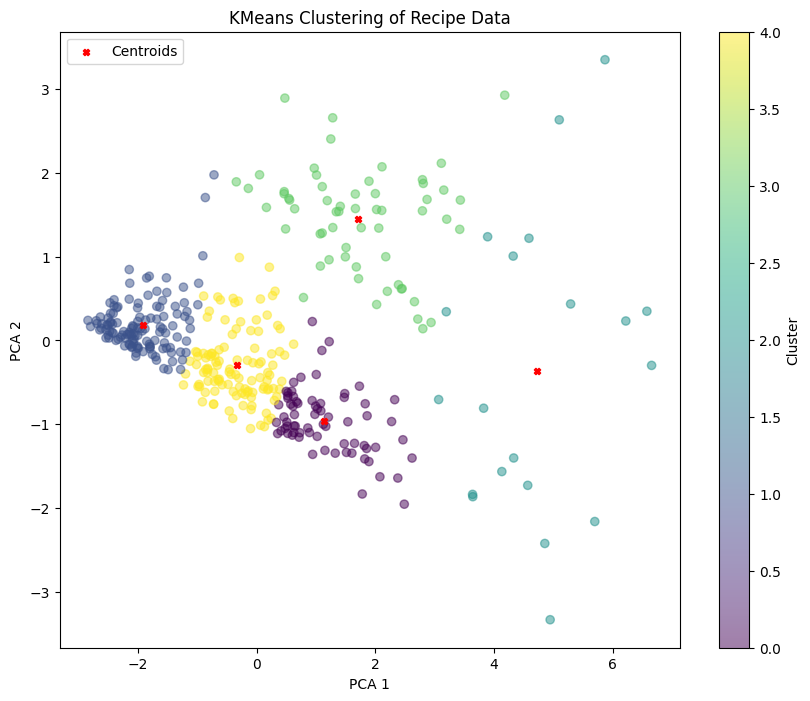

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10, 8))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='viridis', alpha=0.5)
#add legend
plt.colorbar(label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', marker='X', label='Centroids')
plt.legend()
plt.title('KMeans Clustering of Recipe Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [7]:
#for each cluster, print the mean of each feature
numeric_columns = ['GHG', 'calories_kcal', 'fat_g', 'carbs_g', 'protein_g']
for i in range(5):
    print(f'Cluster {i}:')
    print(f'Count: {len(df[df["cluster"] == i])}')
    print(df[df['cluster'] == i][numeric_columns].mean())
    print()

Cluster 0:
Count: 70
GHG              779.503039
calories_kcal    343.632014
fat_g             24.462245
carbs_g           12.499736
protein_g         21.436564
dtype: float64

Cluster 1:
Count: 124
GHG              186.310412
calories_kcal     97.987840
fat_g              5.506550
carbs_g            9.676643
protein_g          4.256260
dtype: float64

Cluster 2:
Count: 20
GHG              1144.271965
calories_kcal     753.576066
fat_g              45.892609
carbs_g            55.658966
protein_g          34.212351
dtype: float64

Cluster 3:
Count: 59
GHG              627.728633
calories_kcal    499.363068
fat_g             17.824474
carbs_g           69.685370
protein_g         18.557601
dtype: float64

Cluster 4:
Count: 114
GHG              471.313734
calories_kcal    226.802386
fat_g             13.872085
carbs_g           13.671661
protein_g         14.222457
dtype: float64



In [8]:
model_path = 'models'

joblib.dump(scaler, os.path.join(model_path, 'scaler_model.pkl'))
joblib.dump(pca, os.path.join(model_path, 'pca_model.pkl'))
joblib.dump(kmeans, os.path.join(model_path, 'kmeans_model.pkl'))


['models/kmeans_model.pkl']

In [ ]:
#load the model
#scaler = joblib.load(os.path.join(model_path, 'scaler_model.pkl'))
#pca = joblib.load(os.path.join(model_path, 'pca_model.pkl'))
#kmeans = joblib.load(os.path.join(model_path, 'kmeans_model.pkl'))